In [595]:
import qcfractal.interface as ptl
client = ptl.FractalClient(address="localhost:7777", verify=False)

In [596]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [597]:
%run /home/fastdata/Shared/Masters_Project/My_Classes.ipynb


In [598]:
ds_mols = client.get_collection("OptimizationDataset", "project_molecules")

# optimising CH4, H2CO and C2H2 with the optimisation workflow with 3 different levels of theory & basis sets

- b3lyp-d3bj_def2-svpd
- m06-2x-d3bj_def2-tzvp
- hf-3c-d3bj_MINIX 
- b3lypj_def2-svpd
- m06-2x_def2-tzvp
- hf-3c_MINIX

### set up the molecules and add the specifications 

In [472]:
molecules=['CH4','H2CO','C2H2','CO','CO2','CO2_CO','CO2_CO2','H2O','H2O_H2O']

LoTs=['b3lyp-d3bj_def2-svpd','b3lyp_def2-svpd','hf-3c_MINIX',
      'hf_MINIX','hf-d3bj_sto-3g','hf_sto-3g','mpwb1k-d3bj_def2-tzvp','mpwb1k-d3bj_def2-svpd']

In [473]:

CH4_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'CH4',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    CH4_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(CH4_energies)       


None


None


None


None


None


None


None


None
[-40.49274247427291, -40.49082965381256, -39.93976789065672, -39.937458020425595, -39.7408756035934, -39.72701071606258, -40.496947119041415, -40.45244718425112]


In [474]:
H2CO_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'H2CO',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    H2CO_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(H2CO_energies) 



        

None


None


None


None


None


None


None


None
[-114.42858729584833, -114.42675300794062, -113.11535940293443, -113.07238405306406, -112.36705172674245, -112.35453148153964, -114.49097143769308, -114.36376513664463]


In [475]:
C2H2_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'C2H2',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    C2H2_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(C2H2_energies)      

None


None


None


None


None


None


None


None
[-77.27926622847151, -77.27700169639475, -76.32074591662446, -76.29565933905225, -75.87084705876099, -75.85648896683178, -77.3110919400631, -77.22475554033615]


In [476]:
energies={i:j  for i,j in zip(molecules ,[CH4_energies,H2CO_energies,C2H2_energies])   
}

results_df=pd.DataFrame(energies,index=LoTs)

In [477]:
results_df

,CH4,H2CO,C2H2
b3lyp-d3bj_def2-svpd,-4.049274e+01,-1.144286e+02,-7.727927e+01
b3lyp_def2-svpd,-4.049083e+01,-1.144268e+02,-7.727700e+01
hf-3c_MINIX,-3.993977e+01,-1.131154e+02,-7.632075e+01
hf_MINIX,-3.993746e+01,-1.130724e+02,-7.629566e+01
hf-d3bj_sto-3g,-3.974088e+01,-1.123671e+02,-7.587085e+01
hf_sto-3g,-3.972701e+01,-1.123545e+02,-7.585649e+01
mpwb1k-d3bj_def2-tzvp,-4.049695e+01,-1.144910e+02,-7.731109e+01
mpwb1k-d3bj_def2-svpd,-4.045245e+01,-1.143638e+02,-7.722476e+01


In [478]:
for spec in ds_mols.df.columns:
    for entry in ds_mols.df.index:
        optimisation.restart_job(new_tag='basic_small')

In [479]:
ds_mols  = client.get_collection("OptimizationDataset", "project_molecules")
ds_mols.status(collapse = False)


,blyp-d3bj_def2-svpd,b3lyp-d3bj_def2-svpd,hf-3c-d3bj_MINIX,b3lyp_def2-svpd,hf-3c_MINIX,hf-d3bj_sto-3g,hf_sto-3g,hf_MINIX,mpwb1k-d3bj_def2-tzvp,mpwb1k-d3bj_def2-svpd
NH3,COMPLETE,None,None,None,None,None,None,None,None,None
CH3OH,COMPLETE,None,None,None,None,None,None,None,None,None
H2O,None,None,None,None,None,None,None,None,None,COMPLETE
CO2,None,None,None,None,None,None,None,None,None,COMPLETE
CO,None,None,None,None,None,None,None,None,None,COMPLETE
CO2_CO2,None,None,None,None,None,None,None,None,None,COMPLETE
H2O_H2O,None,None,None,None,None,COMPLETE,None,None,None,None
CO2_CO,None,None,None,None,None,None,None,None,None,COMPLETE
CH4,None,None,None,None,None,None,None,None,None,COMPLETE
H2CO,None,None,None,None,None,None,None,None,None,COMPLETE


In [480]:
#del ds_mols.data.specs['m06-2x_def2-tzvp']
ds_mols.save()

'1028'

# dimer of CO2/CO  and H2O (make them on avogadro and then run the optimisation workflow)

In [531]:
CO2_CO_energies=[]
#for LoT in LoTs:
optimisation=workflow(ds_mols,'CO2_CO','hf-d3bj_sto-3g')
optimisation.add_specification()
optimisation.setup_molecule()
optimisation.compute_molecule('basic_small')
print(optimisation.get_results()[1].show_history())
CO2_CO_energies.append((optimisation.get_results()[1].get_final_energy()))
    
   
    
    

       
print(CO2_CO_energies)       


None
[-296.31382973871024]


In [532]:
optimisation.get_results()[1].get_final_molecule()


NGLWidget()

In [533]:
optimisation.get_results()[1].get_final_molecule().measure([0,3])

5.537710035004712

In [484]:
results_df['CO2_CO']=CO2_CO_energies
results_df



,CH4,H2CO,C2H2,CO2_CO
b3lyp-d3bj_def2-svpd,-4.049274e+01,-1.144286e+02,-7.727927e+01,-3.016950e+02
b3lyp_def2-svpd,-4.049083e+01,-1.144268e+02,-7.727700e+01,-3.016912e+02
hf-3c_MINIX,-3.993977e+01,-1.131154e+02,-7.632075e+01,-2.983788e+02
hf_MINIX,-3.993746e+01,-1.130724e+02,-7.629566e+01,-2.982158e+02
hf-d3bj_sto-3g,-3.974088e+01,-1.123671e+02,-7.587085e+01,-2.963138e+02
hf_sto-3g,-3.972701e+01,-1.123545e+02,-7.585649e+01,-2.962956e+02
mpwb1k-d3bj_def2-tzvp,-4.049695e+01,-1.144910e+02,-7.731109e+01,-3.018997e+02
mpwb1k-d3bj_def2-svpd,-4.045245e+01,-1.143638e+02,-7.722476e+01,-3.015562e+02


In [523]:
H2O_H2O_energies=[]
for LoT in LoTs:
    optimisation=workflow(ds_mols,'H2O_H2O',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    H2O_H2O_energies.append((optimisation.get_results()[1].get_final_energy()))
   
    
    

       
print(H2O_H2O_energies) 

None


None


None


None


None


None


None


None
[-152.77110408541793, -152.7689501861874, -151.03437849477197, -151.02106397406703, -149.95411956007644, -149.94140535621887, -152.8528257706319, -152.68635303358323]


In [524]:
optimisation.get_results()[1].get_final_molecule()

NGLWidget()

In [525]:
optimisation.get_results()[1].get_final_molecule().measure([0,4]) #H-bonding length

3.660008903704991

In [488]:
results_df['H2O_H2O']=H2O_H2O_energies
results_df

,CH4,H2CO,C2H2,CO2_CO,H2O_H2O
b3lyp-d3bj_def2-svpd,-4.049274e+01,-1.144286e+02,-7.727927e+01,-3.016950e+02,-1.499541e+02
b3lyp_def2-svpd,-4.049083e+01,-1.144268e+02,-7.727700e+01,-3.016912e+02,-1.499541e+02
hf-3c_MINIX,-3.993977e+01,-1.131154e+02,-7.632075e+01,-2.983788e+02,-1.499541e+02
hf_MINIX,-3.993746e+01,-1.130724e+02,-7.629566e+01,-2.982158e+02,-1.499541e+02
hf-d3bj_sto-3g,-3.974088e+01,-1.123671e+02,-7.587085e+01,-2.963138e+02,-1.499541e+02
hf_sto-3g,-3.972701e+01,-1.123545e+02,-7.585649e+01,-2.962956e+02,-1.499541e+02
mpwb1k-d3bj_def2-tzvp,-4.049695e+01,-1.144910e+02,-7.731109e+01,-3.018997e+02,-1.499541e+02
mpwb1k-d3bj_def2-svpd,-4.045245e+01,-1.143638e+02,-7.722476e+01,-3.015562e+02,-1.499541e+02


In [612]:
H2O_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'H2O',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    H2O_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(H2O_energies)

None


None


None


None


None


None


None


None
[-76.380992037485, -76.38041821745861, -75.51244523398331, -75.50556343833674, -74.970498196384, -74.96599011779216, -76.4218869322801, -76.338891675368]


In [593]:
CO2_CO2_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'CO2_CO2',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    CO2_CO2_energies.append((optimisation.get_results()[1].get_final_energy()))

    
        
print(CO2_CO2_energies)

None


None


None


None


None


None


None


None
[-376.9191057729864, -376.9167931270178, -372.7786458161511, -372.5732862562401, -370.15788975462397, -370.13727469806537, -377.1755406982618, -376.7497663562582]


In [594]:
optimisation.get_results()[1].get_final_molecule()

NGLWidget()

In [592]:
optimisation.get_results()[1].get_final_molecule().measure([4,1,3])

12.413528890231909

- Seems to be that the levels of theories that take dispersion relation into account optimise the geometry in many less steps than their non dispersion factoring counterparts (5 compared to orders of 10). 

In [492]:
CO2_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'CO2',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    CO2_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(CO2_energies)

None


None


None


None


None


None


None


None
[-188.45955362833902, -188.45791077942738, -186.387989673943, -186.28657991485238, -185.07901159425847, -185.06860962171322, -188.58778082478491, -188.37484884133784]


In [493]:
CO_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'CO',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    CO_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(CO_energies)

None


None


None


None


None


None


None


None
[-113.2330814439126, -113.23235369390338, -111.9880232701547, -111.92818807466858, -111.23085656222912, -111.2256238959865, -113.31016966884538, -113.1791705305159]


In [515]:
molecules=['CH4','H2CO','C2H2','CO','CO2','CO2_CO','CO2_CO2','H2O','H2O_H2O']
energies={i:j  for i,j in zip(molecules ,[CH4_energies,H2CO_energies,C2H2_energies,CO_energies,CO2_energies,CO2_CO_energies,CO2_CO2_energies,H2O_energies,H2O_H2O_energies])   
}

results_df=pd.DataFrame(energies,index=LoTs)

In [516]:
results_df


,CH4,H2CO,C2H2,CO,CO2,CO2_CO,CO2_CO2,H2O,H2O_H2O
b3lyp-d3bj_def2-svpd,-4.049274e+01,-1.144286e+02,-7.727927e+01,-1.132331e+02,-1.884596e+02,-3.016950e+02,-3.769191e+02,-7.638099e+01,-1.527711e+02
b3lyp_def2-svpd,-4.049083e+01,-1.144268e+02,-7.727700e+01,-1.132324e+02,-1.884579e+02,-3.016912e+02,-3.769168e+02,-7.638042e+01,-1.527690e+02
hf-3c_MINIX,-3.993977e+01,-1.131154e+02,-7.632075e+01,-1.119880e+02,-1.863880e+02,-2.983788e+02,-3.727786e+02,-7.551245e+01,-1.510344e+02
hf_MINIX,-3.993746e+01,-1.130724e+02,-7.629566e+01,-1.119282e+02,-1.862866e+02,-2.982158e+02,-3.725733e+02,-7.550556e+01,-1.510211e+02
hf-d3bj_sto-3g,-3.974088e+01,-1.123671e+02,-7.587085e+01,-1.112309e+02,-1.850790e+02,-2.963138e+02,-3.701579e+02,-7.497050e+01,-1.499541e+02
hf_sto-3g,-3.972701e+01,-1.123545e+02,-7.585649e+01,-1.112256e+02,-1.850686e+02,-2.962956e+02,-3.701373e+02,-7.496599e+01,-1.499414e+02
mpwb1k-d3bj_def2-tzvp,-4.049695e+01,-1.144910e+02,-7.731109e+01,-1.133102e+02,-1.885878e+02,-3.018997e+02,-3.771755e+02,-7.642189e+01,-1.528528e+02
mpwb1k-d3bj_def2-svpd,-4.045245e+01,-1.143638e+02,-7.722476e+01,-1.131792e+02,-1.883748e+02,-3.015562e+02,-3.767498e+02,-7.633889e+01,-1.526864e+02


# calculating the BE by hand (bovolenta paper)

In [496]:
ds_mols=client.get_collection('OptimizationDataset', 'c2h2_w12_1')
ds_mols.status(collapse=False)

,mpwb1k-d3bj_def2-tzvp
c2h2_w12_1_0001,COMPLETE
c2h2_w12_1_0002,COMPLETE
c2h2_w12_1_0003,COMPLETE
c2h2_w12_1_0004,COMPLETE
c2h2_w12_1_0005,COMPLETE
c2h2_w12_1_0006,COMPLETE
c2h2_w12_1_0007,COMPLETE
c2h2_w12_1_0008,COMPLETE
c2h2_w12_1_0009,COMPLETE
c2h2_w12_1_0010,COMPLETE


In [517]:
def BE(dimer,molecule_1,molecule_2):
    
    return dimer - (molecule_1+molecule_2)

    

In [518]:
results_df['BE_CO2_CO']=BE(results_df['CO2_CO'],results_df['CO2'],results_df['CO'])
results_df['BE_CO2_CO2']=BE(results_df['CO2_CO2'],results_df['CO2'],results_df['CO2'])
results_df['BE_H2O_H2O']=BE(results_df['H2O_H2O'],results_df['H2O'],results_df['H2O'])




In [521]:
#convert from Hatrees to Kelvin (315777.09 K = 1.000000 Ha)

results_df=results_df*315777.09
pd.options.display.float_format = "{:.6e}".format
results_df

,CH4,H2CO,C2H2,CO,CO2,CO2_CO,CO2_CO2,H2O,H2O_H2O,BE_CO2_CO,BE_CO2_CO2,BE_H2O_H2O
b3lyp-d3bj_def2-svpd,-1.278668e+07,-3.613393e+07,-2.440302e+07,-3.575641e+07,-5.951121e+07,-9.526838e+07,-1.190224e+08,-2.411937e+07,-4.824161e+07,-7.620870e+02,4.685158e-01,-2.879890e+03
b3lyp_def2-svpd,-1.278608e+07,-3.613335e+07,-2.440231e+07,-3.575618e+07,-5.951069e+07,-9.526718e+07,-1.190217e+08,-2.411919e+07,-4.824093e+07,-3.111001e+02,-3.067990e+02,-2.562137e+03
hf-3c_MINIX,-1.261206e+07,-3.571924e+07,-2.410034e+07,-3.536325e+07,-5.885706e+07,-9.422118e+07,-1.177150e+08,-2.384510e+07,-4.769320e+07,-8.728729e+02,-8.420096e+02,-2.996101e+03
hf_MINIX,-1.261133e+07,-3.570567e+07,-2.409242e+07,-3.534436e+07,-5.882503e+07,-9.416971e+07,-1.176501e+08,-2.384293e+07,-4.768899e+07,-3.192870e+02,-3.992260e+01,-3.137908e+03
hf-d3bj_sto-3g,-1.254926e+07,-3.548294e+07,-2.395828e+07,-3.512416e+07,-5.844371e+07,-9.356912e+07,-1.168874e+08,-2.367397e+07,-4.735208e+07,-1.250977e+03,4.213537e+01,-4.143996e+03
hf_sto-3g,-1.254488e+07,-3.547899e+07,-2.395374e+07,-3.512250e+07,-5.844043e+07,-9.356336e+07,-1.168809e+08,-2.367254e+07,-4.734806e+07,-4.254075e+02,-1.751130e+01,-2.976237e+03
mpwb1k-d3bj_def2-tzvp,-1.278801e+07,-3.615363e+07,-2.441307e+07,-3.578076e+07,-5.955170e+07,-9.533301e+07,-1.191034e+08,-2.413228e+07,-4.826742e+07,-5.541885e+02,6.615943e+00,-2.858385e+03
mpwb1k-d3bj_def2-svpd,-1.277396e+07,-3.611346e+07,-2.438581e+07,-3.573939e+07,-5.948446e+07,-9.522453e+07,-1.189689e+08,-2.410607e+07,-4.821485e+07,-6.793242e+02,-2.168554e+01,-2.706110e+03


-646.9055093141466
-147.3385229044484
-3032.595392328316


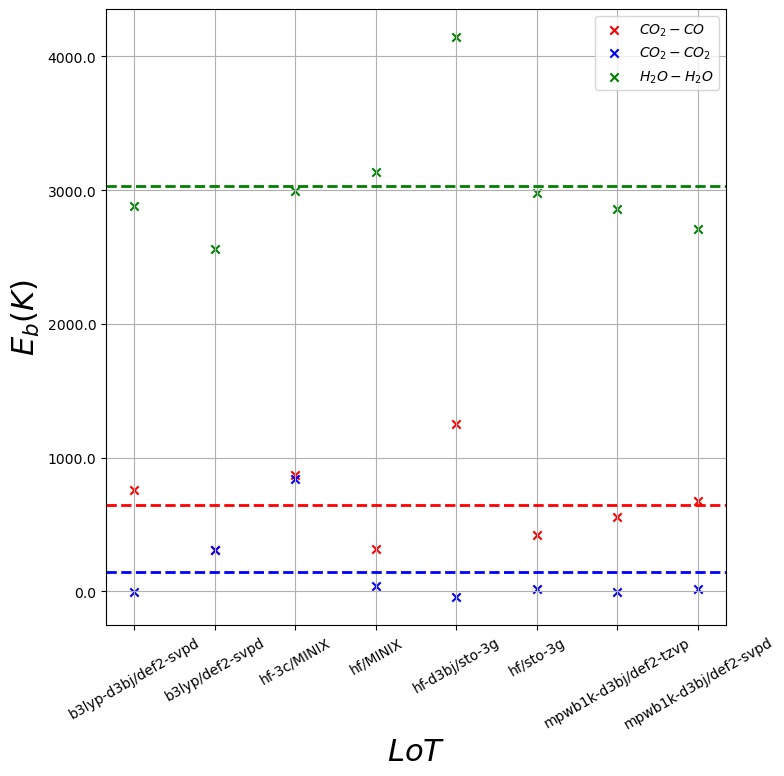

In [522]:
from matplotlib.ticker import FuncFormatter
colours=['red','blue','green']
dimers=['$CO_{2}$']
plt.figure(figsize=(8,8))
plt.grid(True)
# Use FuncFormatter to format the y-axis to 8th order
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e0:.1f}'))



for col,colour in zip(results_df.columns[-3:],colours):
    plt.scatter([f'{i.replace("_","/")}' for i in results_df.index],-results_df[col],label=f"${col.replace('BE_','').replace('_','-').replace('2','_{2}')}$",marker='x',color=colour)
    # Calculate row-wise mean and plot a dashed line for each row
    row_means= results_df[col].mean(axis=0)  # Calculate the mean across each row
    print(row_means)
    # Plot dashed lines for the mean of each row
    plt.axhline(y=-row_means, color=colour, linestyle='--', 
                #label=f'Avg {col.replace("BE_","")}={round(row_means,3)}'
                 linewidth=2)
    # Add a label near the reference line
    #plt.text(x=0, y=row_means, s=f'{row_means:.3e}', #color='green',
    #         verticalalignment='top', horizontalalignment='center', fontsize=10)


    
 
# Enable minor ticks and add minor ticks between major ticks
#plt.minorticks_on()




# Customize minor ticks on the y-axis only
plt.tick_params(axis='y', which='minor', direction='out', length=4, width=1, colors='gray', grid_color='gray', grid_alpha=0.3)
# Customize the x-axis labels: Decrease font size and rotate 30 degrees clockwise
plt.xticks(fontsize=10, rotation=30)
plt.xlabel('$LoT$',fontsize=22)
plt.ylabel('$E_{b} (K)$',fontsize=22)
plt.legend()
    

 ## Checking the status of the sampling of H20 on CD2

In [602]:
client.list_collections('OptimizationDataset','')

tagline
collection          name                     
OptimizationDataset H2O_cd2_01           None
                    c2h2_w12_1           None
                    c2h2_w12_10          None
                    c2h2_w12_11          None
                    c2h2_w12_12          None
...                                       ...
                    pre_oh_w12_6         None
                    project_molecules    None
                    radicals             None
                    small_molecules      None
                    water_12             None

[427 rows x 1 columns]

In [624]:
ds_mols.client.get_collection('OptimizationDataset', 'H2O_cd2_01')
ds_mols.status()

,blyp-d3bj_def2-svpd,b3lyp-d3bj_def2-svpd,hf-3c-d3bj_MINIX,b3lyp_def2-svpd,hf-3c_MINIX,hf-d3bj_sto-3g,hf_sto-3g,hf_MINIX,mpwb1k-d3bj_def2-tzvp,mpwb1k-d3bj_def2-svpd
COMPLETE,2,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,8


In [609]:
ds_CD2 = client.get_collection("OptimizationDataset", "co2_beep")
ds_CD2.status(collapse=False)

,mpwb1k-d3bj_def2-tzvp,mpwb1k-d3bj_def2-svpd
CD2_01,COMPLETE,COMPLETE
CD3_01,COMPLETE,COMPLETE
CD3_02,COMPLETE,COMPLETE
CD1_01,COMPLETE,COMPLETE


In [631]:
H20_CD2_xyz ='''C	-0.1055618208    0.3020596169    0.0497206993
O	-0.9639502693   -0.4587372250   -0.0424434049
O        0.7613782430    1.0504609231    0.1395597122
C	-3.3577692113    1.9968904426    0.3826614453
O	-4.4548568760    1.6581021583    0.3295301539
O	-2.2520035973    2.3129741620    0.4048465218
O	-4.1322357202    3.6468698212    2.4054941520
H	-3.8588546589    4.3045721258    3.0369367173
H	-5.0687447229    3.5228805206    2.5323045503'''

In [632]:
mol_H2O_CD2 = ptl.Molecule.from_data(H20_CD2_xyz)
mol_H2O_CD2

NGLWidget()